In [646]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [647]:
df = pd.read_csv('../data/cleaned_2.csv')
df.head()

,Unnamed: 0,NOx,CO,NO2,NO,AQI,PM2.5,O3,SO2,Benzene,Toluene,Datetime
0,16,13.75,0.1,23.00,1.93,155.0,104.00,117.62,15.30,0.30,10.40,2017-11-25 09:00:00
1,17,9.75,0.1,16.25,1.33,159.0,94.50,136.23,17.00,0.28,7.10,2017-11-25 10:00:00
2,18,9.07,0.1,14.83,1.47,173.0,82.75,149.92,15.40,0.20,4.55,2017-11-25 11:00:00
3,21,8.35,0.1,13.60,1.35,191.0,68.50,161.70,21.80,0.10,2.30,2017-11-25 14:00:00
4,22,7.55,0.1,11.80,1.52,191.0,69.25,161.68,21.38,0.10,2.35,2017-11-25 15:00:00


In [648]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#df.columns

In [649]:
df.Datetime = pd.to_datetime(df.Datetime)

In [650]:
df['Year'] = df.Datetime.dt.year

In [651]:
from sklearn.preprocessing import OrdinalEncoder

In [652]:
oe = OrdinalEncoder()
df['Year'] = oe.fit_transform(df.Year.to_numpy().reshape(-1, 1))

In [653]:
df_dev = df.sample(n=30000)
df_dev.head()

,NOx,CO,NO2,NO,AQI,PM2.5,O3,SO2,Benzene,Toluene,Datetime,Year
547792,48.06,21.23,66.04,21.23,325.0,15.41,14.96,184.37,3.10,12.17,2020-03-25 05:00:00,5.0
507244,17.40,2.10,27.12,3.62,129.0,30.00,40.50,17.20,2.67,19.75,2020-05-31 23:00:00,5.0
82769,79.62,2.90,67.62,53.50,306.0,247.00,1.73,11.30,2.05,16.83,2020-01-12 00:00:00,5.0
730254,29.15,0.70,49.65,3.38,108.0,37.00,58.23,0.85,3.00,8.10,2019-06-05 23:00:00,4.0
420618,34.66,0.95,35.33,2.36,232.0,35.60,33.17,26.92,7.68,18.93,2017-02-10 16:00:00,2.0


In [9]:
df_dev.to_csv('../data/lw2_small.csv')


In [654]:
df = pd.read_csv('../data/lw2_small.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,NOx,CO,NO2,NO,AQI,PM2.5,O3,SO2,Benzene,Toluene,Datetime,Year
0,4.30,0.33,7.48,0.40,53.0,26.00,15.15,3.05,0.05,2.05,2017-08-16 20:00:00,2.0
1,12.65,0.89,18.23,3.69,251.0,48.88,89.87,10.93,0.97,4.80,2019-10-11 18:00:00,4.0
2,15.93,0.83,24.85,3.32,252.0,72.50,88.72,20.40,4.22,18.93,2019-10-18 13:00:00,4.0
3,21.47,1.60,10.71,10.75,84.0,20.87,13.56,8.83,0.03,0.14,2019-09-12 10:00:00,4.0
4,214.73,4.88,69.07,112.21,289.0,127.83,47.92,50.24,20.24,61.40,2017-05-23 22:00:00,2.0


<AxesSubplot:xlabel='AQI', ylabel='Density'>

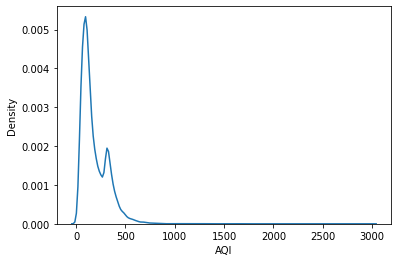

In [656]:
sns.kdeplot(data=df, x='AQI')

In [657]:
columns = ['NO', 'CO', 'NO2', 'O3', 'SO2', 'Benzene', 'Toluene', 'AQI', 'Year']
continues_cols = ['NO', 'CO', 'NO2', 'O3', 'SO2', 'Benzene', 'Toluene', 'AQI']
len(continues_cols)

8

In [660]:
df = df[columns]
df.head()

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI,Year
0,0.40,0.33,7.48,15.15,3.05,0.05,2.05,53.0,2.0
1,3.69,0.89,18.23,89.87,10.93,0.97,4.80,251.0,4.0
2,3.32,0.83,24.85,88.72,20.40,4.22,18.93,252.0,4.0
3,10.75,1.60,10.71,13.56,8.83,0.03,0.14,84.0,4.0
4,112.21,4.88,69.07,47.92,50.24,20.24,61.40,289.0,2.0


In [665]:
z_scores = stats.zscore(df[continues_cols])
abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
filtered_df = df[filtered]
filtered_df.head()

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI,Year
0,0.40,0.33,7.48,15.15,3.05,0.05,2.05,53.0,2.0
1,3.69,0.89,18.23,89.87,10.93,0.97,4.80,251.0,4.0
2,3.32,0.83,24.85,88.72,20.40,4.22,18.93,252.0,4.0
3,10.75,1.60,10.71,13.56,8.83,0.03,0.14,84.0,4.0
5,12.28,0.66,3.50,24.18,9.15,0.00,0.82,34.0,4.0


In [666]:
df = filtered_df
filtered_df.count()

NO         23813
CO         23813
NO2        23813
O3         23813
SO2        23813
Benzene    23813
Toluene    23813
AQI        23813
Year       23813
dtype: int64

In [667]:
df_cont = df[continues_cols]
df_cont.head()

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI
0,0.40,0.33,7.48,15.15,3.05,0.05,2.05,53.0
1,3.69,0.89,18.23,89.87,10.93,0.97,4.80,251.0
2,3.32,0.83,24.85,88.72,20.40,4.22,18.93,252.0
3,10.75,1.60,10.71,13.56,8.83,0.03,0.14,84.0
5,12.28,0.66,3.50,24.18,9.15,0.00,0.82,34.0


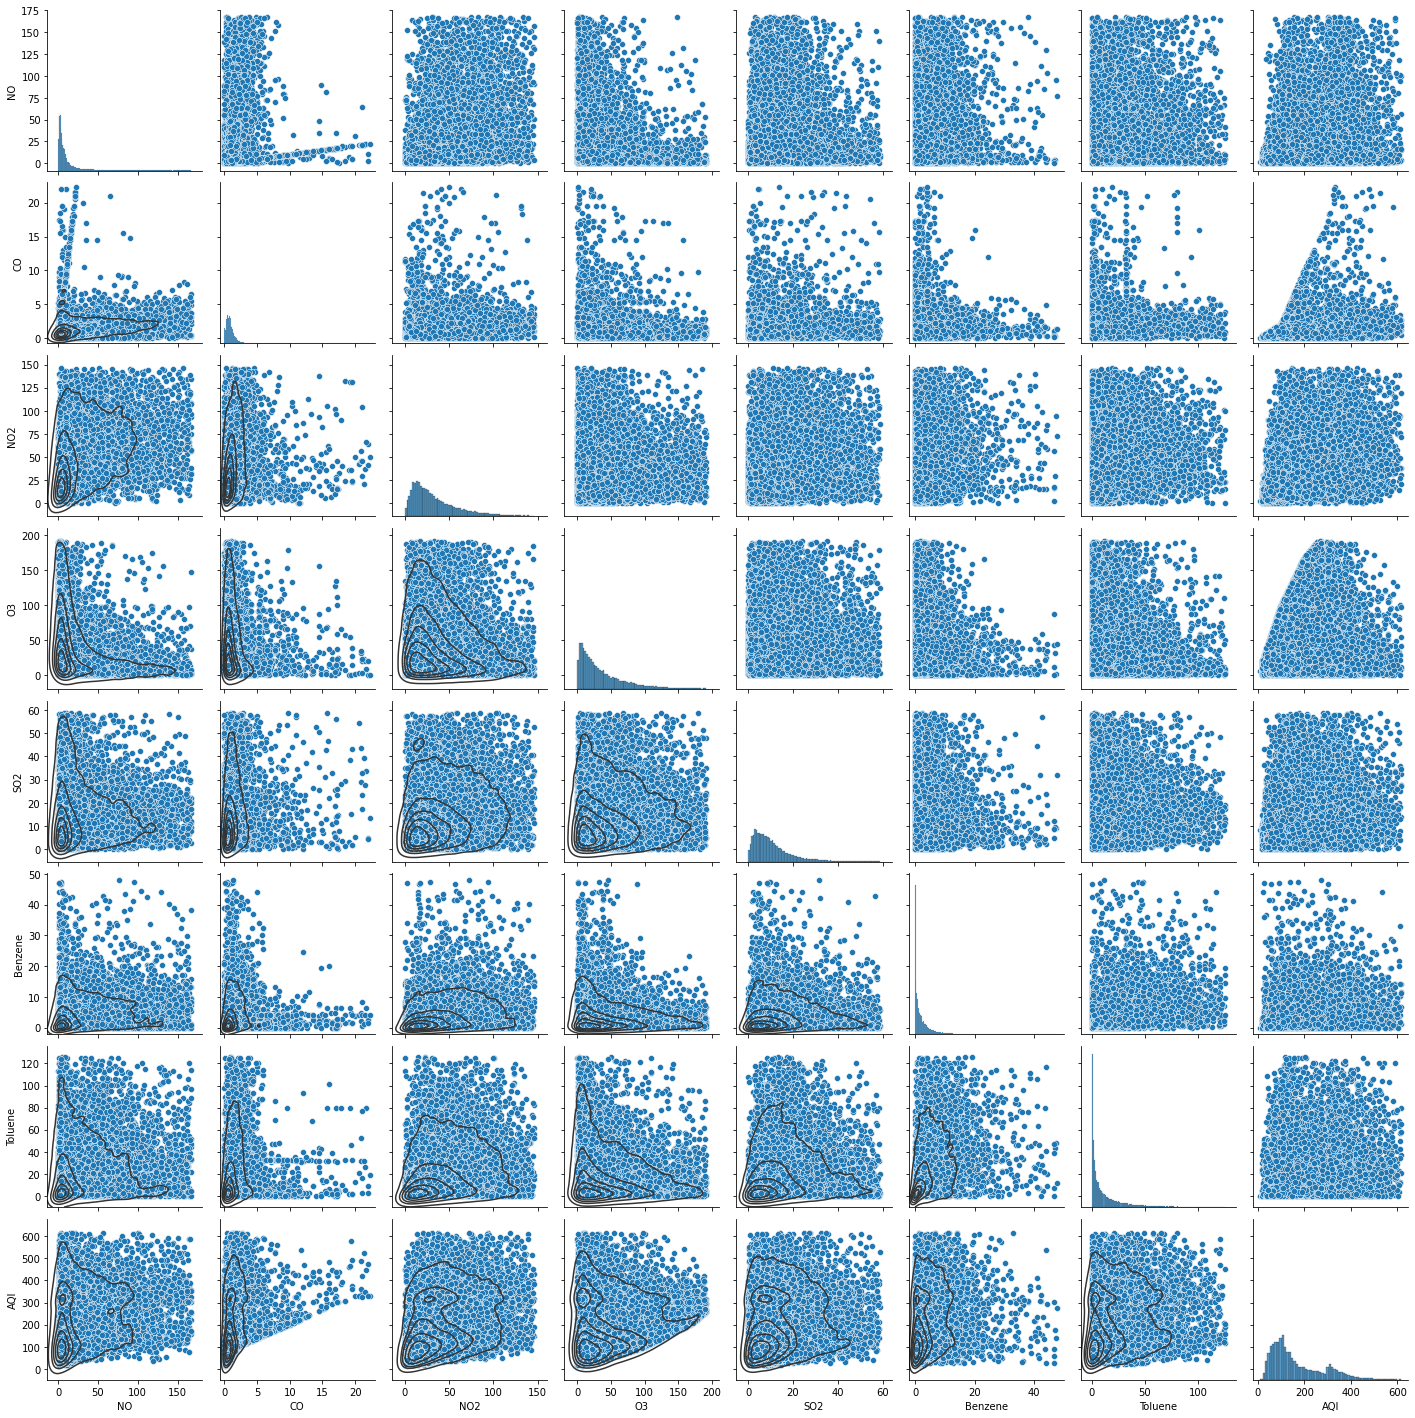

In [664]:
g = sns.pairplot(df_cont)
g.map_lower(sns.kdeplot, levels=6, color=".2")

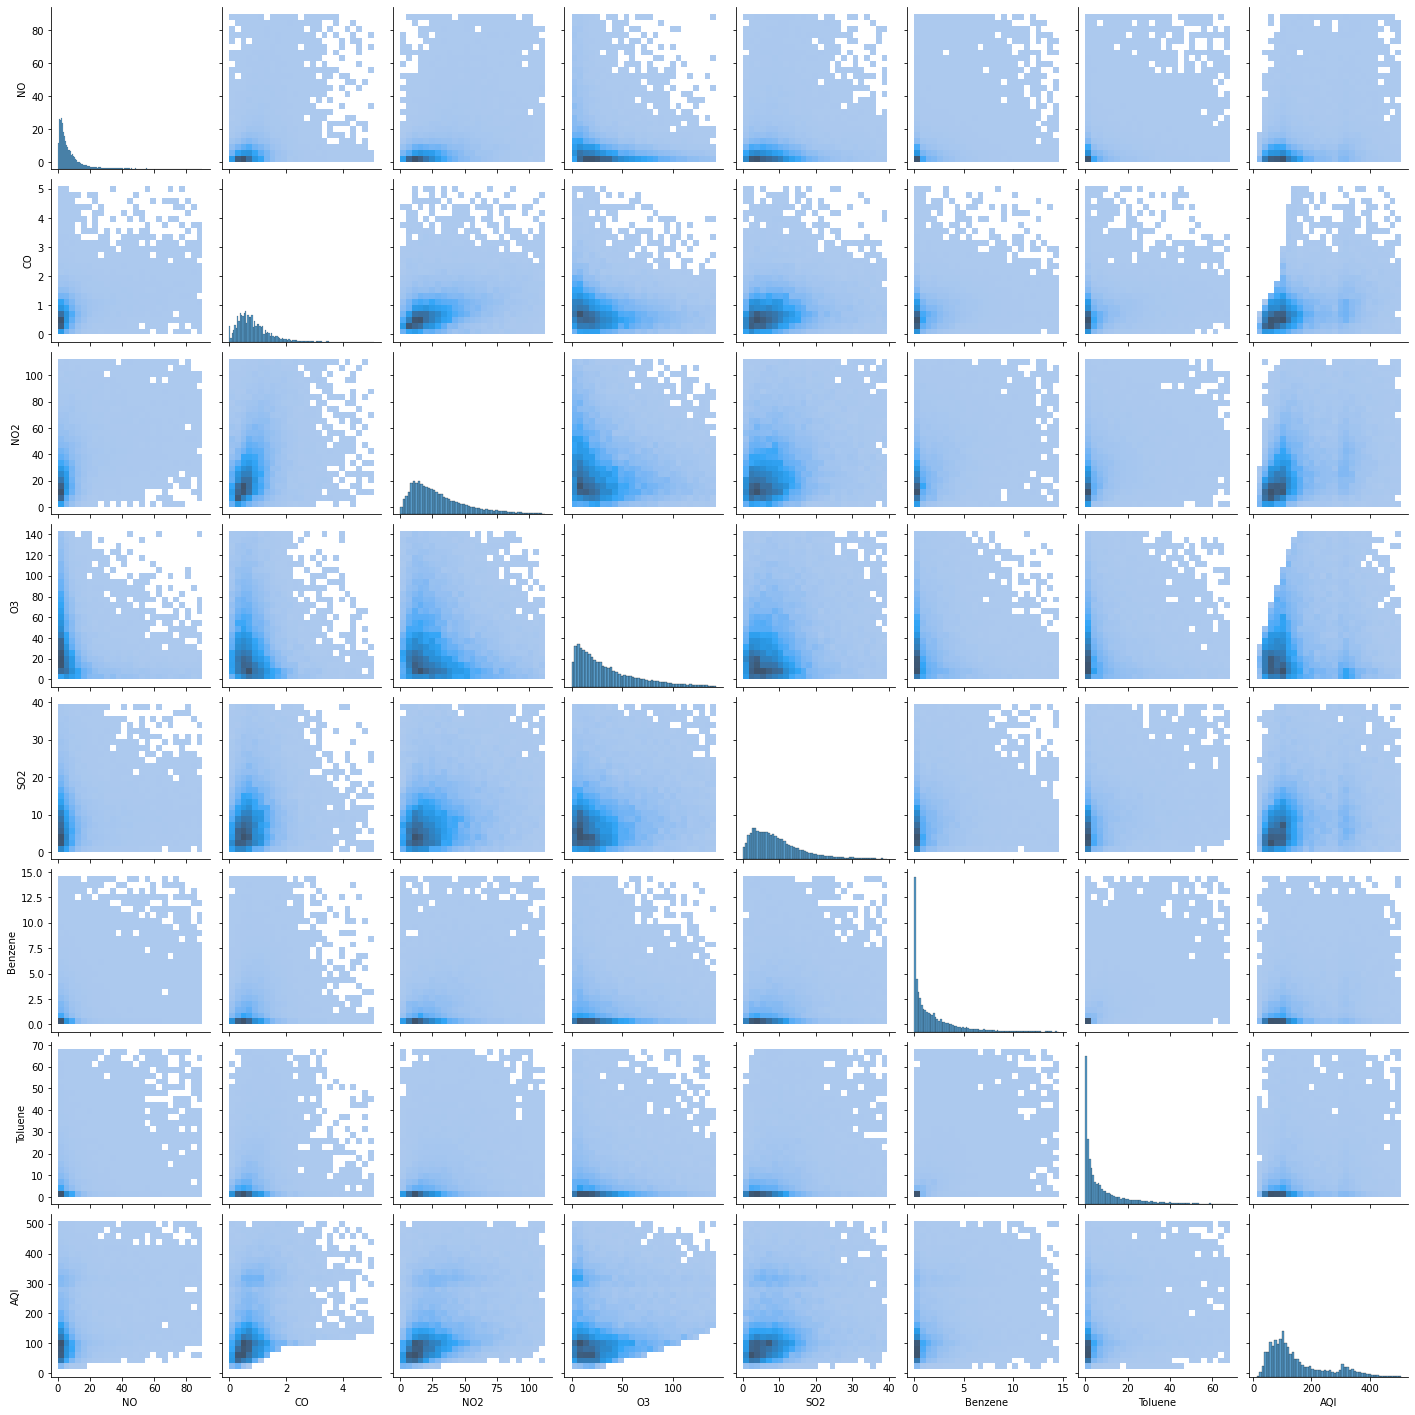

In [668]:
sns.pairplot(df_cont, kind='hist', plot_kws={'bins': 25})

In [669]:
df_cont.mean()

NO          10.465250
CO           0.862699
NO2         30.741813
O3          35.421277
SO2          9.747052
Benzene      1.916113
Toluene      9.605062
AQI        153.965061
dtype: float64

In [670]:
df_cont.var()

NO           215.384247
CO             0.378987
NO2          498.967416
O3           929.814485
SO2           55.797716
Benzene        5.996090
Toluene      164.993559
AQI        10548.138541
dtype: float64

In [671]:
print(df_cont.cov().to_latex())
df_cont.cov()


\begin{tabular}{lrrrrrrrr}
\toprule
{} &          NO &         CO &         NO2 &          O3 &         SO2 &    Benzene &     Toluene &           AQI \\
\midrule
NO      &  215.384247 &   3.292075 &  141.395674 & -115.139485 &    9.955568 &  10.200202 &   44.840521 &    409.962685 \\
CO      &    3.292075 &   0.378987 &    4.709230 &   -2.040849 &    0.740669 &   0.344139 &    1.949324 &     20.416690 \\
NO2     &  141.395674 &   4.709230 &  498.967416 &  -76.864897 &   37.758918 &  18.258773 &   92.934966 &    846.377089 \\
O3      & -115.139485 &  -2.040849 &  -76.864897 &  929.814485 &   28.051384 &  -3.402598 &  -18.403095 &    310.412600 \\
SO2     &    9.955568 &   0.740669 &   37.758918 &   28.051384 &   55.797716 &   3.704437 &   25.106133 &    188.609869 \\
Benzene &   10.200202 &   0.344139 &   18.258773 &   -3.402598 &    3.704437 &   5.996090 &   16.781264 &     76.666374 \\
Toluene &   44.840521 &   1.949324 &   92.934966 &  -18.403095 &   25.106133 &  16.781264 &  164.99

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI
NO,215.384247,3.292075,141.395674,-115.139485,9.955568,10.200202,44.840521,409.962685
CO,3.292075,0.378987,4.709230,-2.040849,0.740669,0.344139,1.949324,20.416690
NO2,141.395674,4.709230,498.967416,-76.864897,37.758918,18.258773,92.934966,846.377089
O3,-115.139485,-2.040849,-76.864897,929.814485,28.051384,-3.402598,-18.403095,310.412600
SO2,9.955568,0.740669,37.758918,28.051384,55.797716,3.704437,25.106133,188.609869
Benzene,10.200202,0.344139,18.258773,-3.402598,3.704437,5.996090,16.781264,76.666374
Toluene,44.840521,1.949324,92.934966,-18.403095,25.106133,16.781264,164.993559,336.755550
AQI,409.962685,20.416690,846.377089,310.412600,188.609869,76.666374,336.755550,10548.138541


# Conditional E[X] and D[X]

In [672]:
conditional_stats = df.groupby(df.Year).agg(["mean", "var"]).reset_index()[continues_cols]

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2


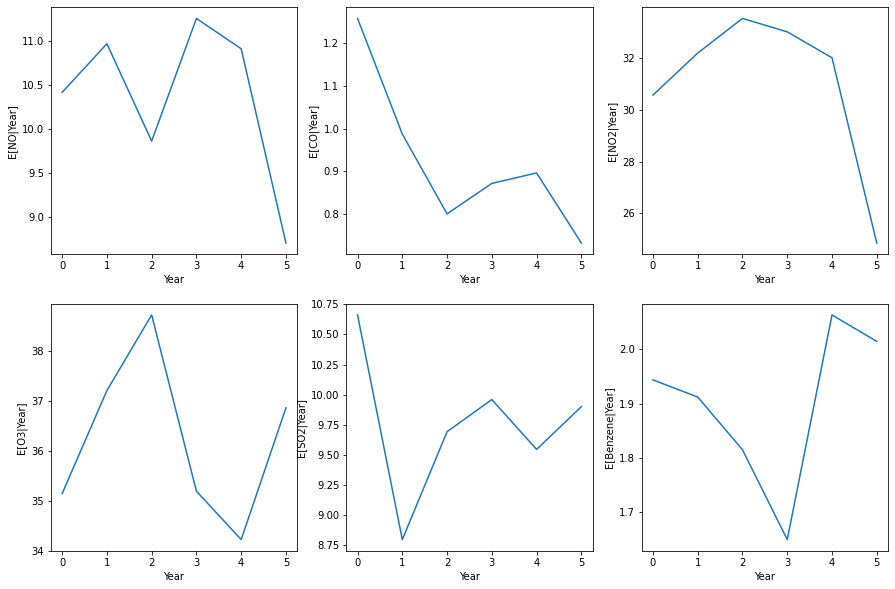

In [673]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
num = 0
for sub_col in conditional_stats.columns[:-1]:
    if sub_col[1] == 'mean':
        row, col = num // 3, num % 3
        print(num, row, col)
        ax[row, col].plot(conditional_stats[sub_col])
        ax[row, col].set_xlabel('Year')
        ax[row, col].set_ylabel(f'E[{sub_col[0]}|Year]')
        num += 1
    if num == 6:
        break

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2


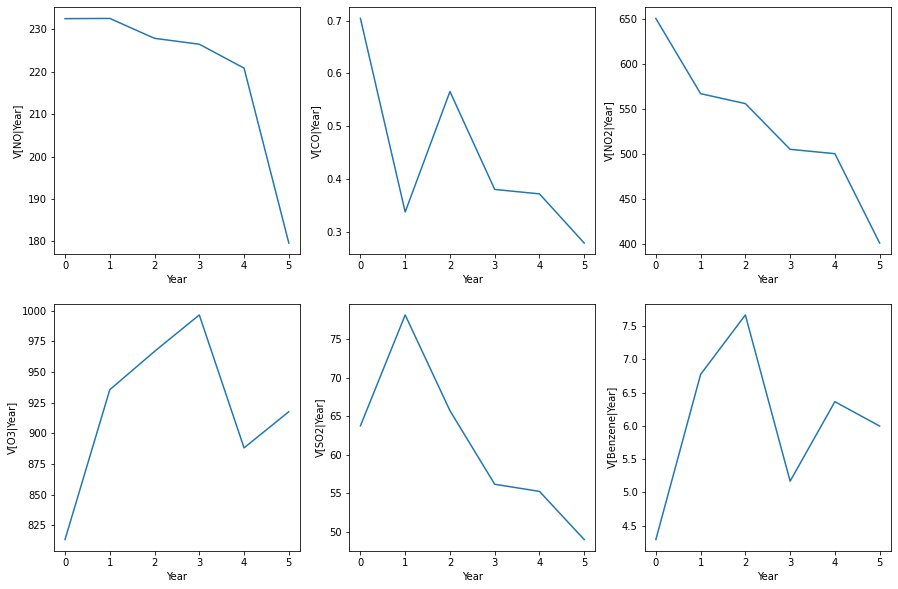

In [674]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
num = 0
for sub_col in conditional_stats.columns[:-1]:
    if sub_col[1] == 'var':
        row, col = num // 3, num % 3
        print(num, row, col)
        ax[row, col].plot(conditional_stats[sub_col])
        ax[row, col].set_xlabel('Year')
        ax[row, col].set_ylabel(f'V[{sub_col[0]}|Year]')
        num += 1
    if num == 6:
        break

## Conditional distributions for first and last year

In [675]:
first_df = df[df.Year == 0][continues_cols]
first_df.head()

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI
113,7.89,1.52,65.93,49.83,20.69,3.00,4.58,357.0
177,22.61,2.32,40.66,12.59,2.44,0.48,1.82,384.0
179,4.47,1.76,4.77,12.97,13.02,3.05,10.90,145.0
197,3.32,0.02,24.82,61.12,4.95,0.38,1.72,61.0
241,2.02,1.56,19.72,51.75,7.00,2.33,6.57,136.0


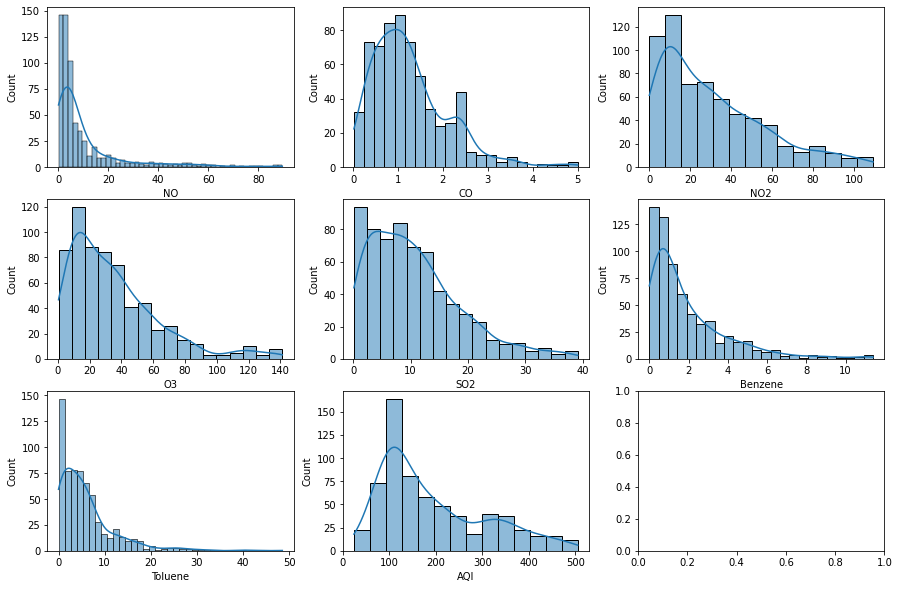

In [676]:
_, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, name in enumerate(first_df.columns[:]):
    row, col = i // 3, i % 3
    sns.histplot(data=first_df, x=name, ax=axs[row, col], kde=True)

In [677]:
last_df = df[df.Year == 5][continues_cols]
last_df.head()

,NO,CO,NO2,O3,SO2,Benzene,Toluene,AQI
14,0.60,0.30,14.30,45.10,11.30,1.57,5.70,82.0
23,7.72,0.98,15.84,100.28,20.49,1.60,2.97,100.0
24,4.32,0.38,15.15,7.80,2.15,0.67,1.38,92.0
25,6.40,1.00,22.32,53.50,32.95,1.32,6.20,107.0
26,0.93,0.50,8.80,21.30,9.93,0.38,3.72,53.0


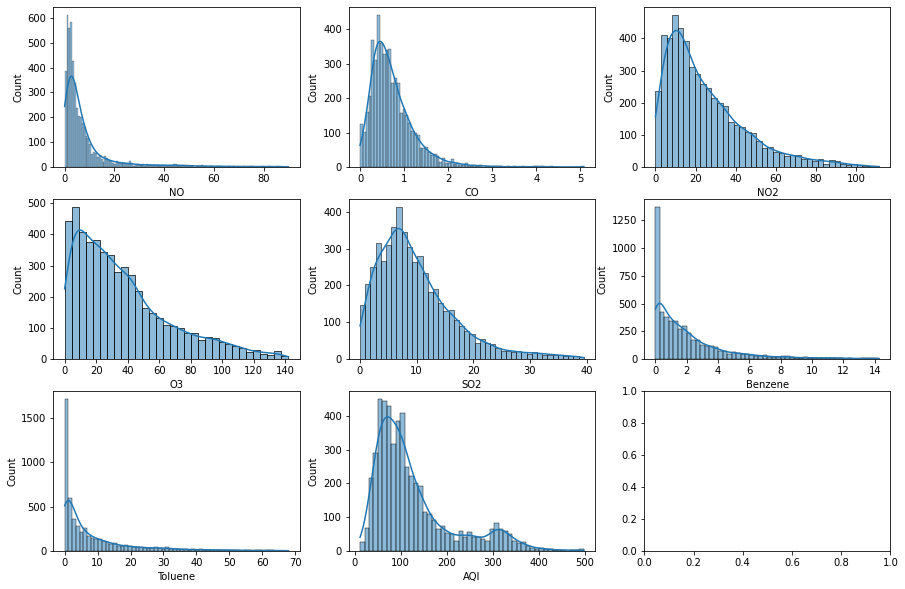

In [679]:
_, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, name in enumerate(last_df.columns[:]):
    row, col = i // 3, i % 3
    sns.histplot(data=last_df, x=name, ax=axs[row, col], kde=True)

<AxesSubplot:>

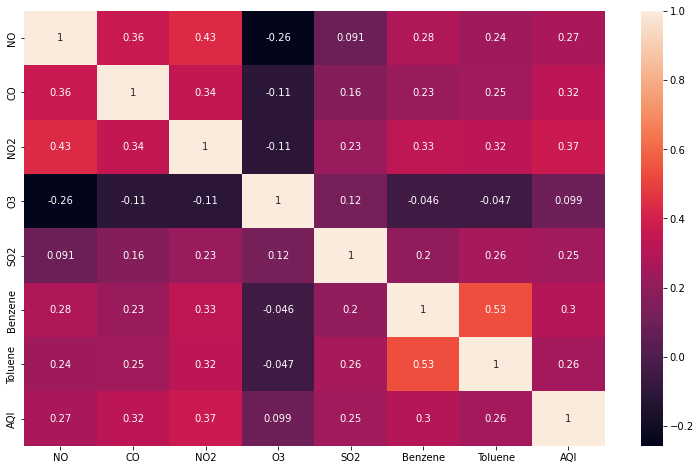

In [680]:
plt.figure(figsize=(13, 8))
sns.heatmap(df_cont.corr(), annot=True)

In [681]:
import scipy.stats as stats

In [682]:
stats.pearsonr(df_cont.Benzene, df_cont.O3)

(-0.04556993646590344, 1.987005966127488e-12)

In [683]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [684]:
pearsonr_ci(df.Benzene, df.Toluene)

(0.5335278572469944, 0.0, 0.5243800835591431, 0.5425524865826793)

In [685]:
pearsonr_ci(df.NO, df.NO2)

(0.4313135092703503, 0.0, 0.4209181760785614, 0.44159556752012546)

In [686]:
pearsonr_ci(df.O3, df.NO)

(-0.2572877800653707, 0.0, -0.26910957441013167, -0.24538846833205483)

In [152]:
pearsonr_ci(df.NO, df.CO)

(0.36652656811432066, 0.0, 0.355536662011327, 0.37741514051821423)

In [730]:
target = 'Toluene'
df_cont.drop('AQI', axis=1, inplace=True)

/home/ryazmax/dls/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [748]:
X, y = df_cont.drop(target, axis=1), df_cont[target]

In [749]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import decomposition

In [750]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
pca = decomposition.PCA(n_components=4)
#X = pca.fit_transform(X)
scaler_y = preprocessing.StandardScaler()
y = y #scaler_y.fit_transform(y.to_numpy().reshape(-1, 1)).reshape(-1)

In [751]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.85)

In [752]:
models = [
    linear_model.Lasso(), 
    #linear_model.ElasticNet(), 
    linear_model.Ridge(alpha=5), 
    linear_model.LinearRegression(),
    #linear_model.Lars(normalize=False),
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}: {metrics.r2_score(y_test, y_pred)}')
    print(f'{model}: {metrics.mean_squared_error(y_test, y_pred)}')

Lasso(): 0.3206749566388719
Lasso(): 107.81445122920391
Ridge(alpha=5): 0.33348887762149704
Ridge(alpha=5): 105.78077696334633
LinearRegression(): 0.3334904144788039
LinearRegression(): 105.78053305149768


In [736]:
residuals = [y_test - model.predict(X_test) for model in models]

In [737]:
[stats.shapiro(residual) for residual in residuals]

[ShapiroResult(statistic=0.8168647885322571, pvalue=0.0),
 ShapiroResult(statistic=0.7957882881164551, pvalue=0.0),
 ShapiroResult(statistic=0.8383018374443054, pvalue=0.0),
 ShapiroResult(statistic=0.8383029699325562, pvalue=0.0),
 ShapiroResult(statistic=0.8383029699325562, pvalue=0.0)]

In [754]:
[stats.kstest(residual, 'norm') for residual in residuals]

[KstestResult(statistic=0.5796348147992614, pvalue=0.0),
 KstestResult(statistic=0.6085378944566817, pvalue=0.0),
 KstestResult(statistic=0.5187110706056519, pvalue=0.0),
 KstestResult(statistic=0.5187085434256749, pvalue=0.0),
 KstestResult(statistic=0.5187085434256757, pvalue=0.0)]

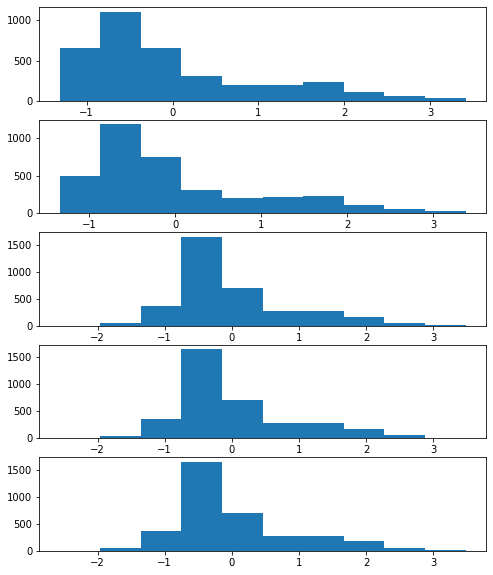

In [720]:
_, axs = plt.subplots(5, 1, figsize=(8, 10))
for i, residual in enumerate(residuals):
    axs[i].hist(residual)

<AxesSubplot:>

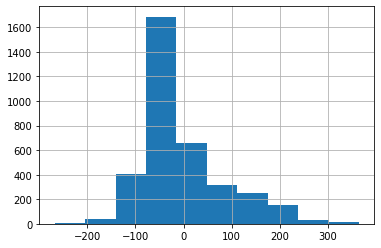

In [696]:
residuals[3].hist()

In [615]:
cliped_target = df_cont[df_cont.Toluene < df_cont.Toluene.quantile(0.75)]
cliped_target.count()

NO         18039
CO         18039
NO2        18039
O3         18039
SO2        18039
Benzene    18039
Toluene    18039
dtype: int64

In [ ]:
for column in continues_cols:
    print(column, cliped_target[column].max(), cliped_target[column].quantile(0.75))

NO 90.4 9.68
CO 5.16 1.02
NO2 112.91 36.025000000000006
O3 142.6 50.78
SO2 39.67 11.51
Benzene 14.63 1.72
Toluene 13.19 5.89


In [390]:
twice_clipped = cliped_target
for column in continues_cols:
    twice_clipped = twice_clipped[twice_clipped[column] < twice_clipped[column].quantile(0.75)]
twice_clipped.count()

NO         2395
CO         2395
NO2        2395
O3         2395
SO2        2395
Benzene    2395
Toluene    2395
dtype: int64

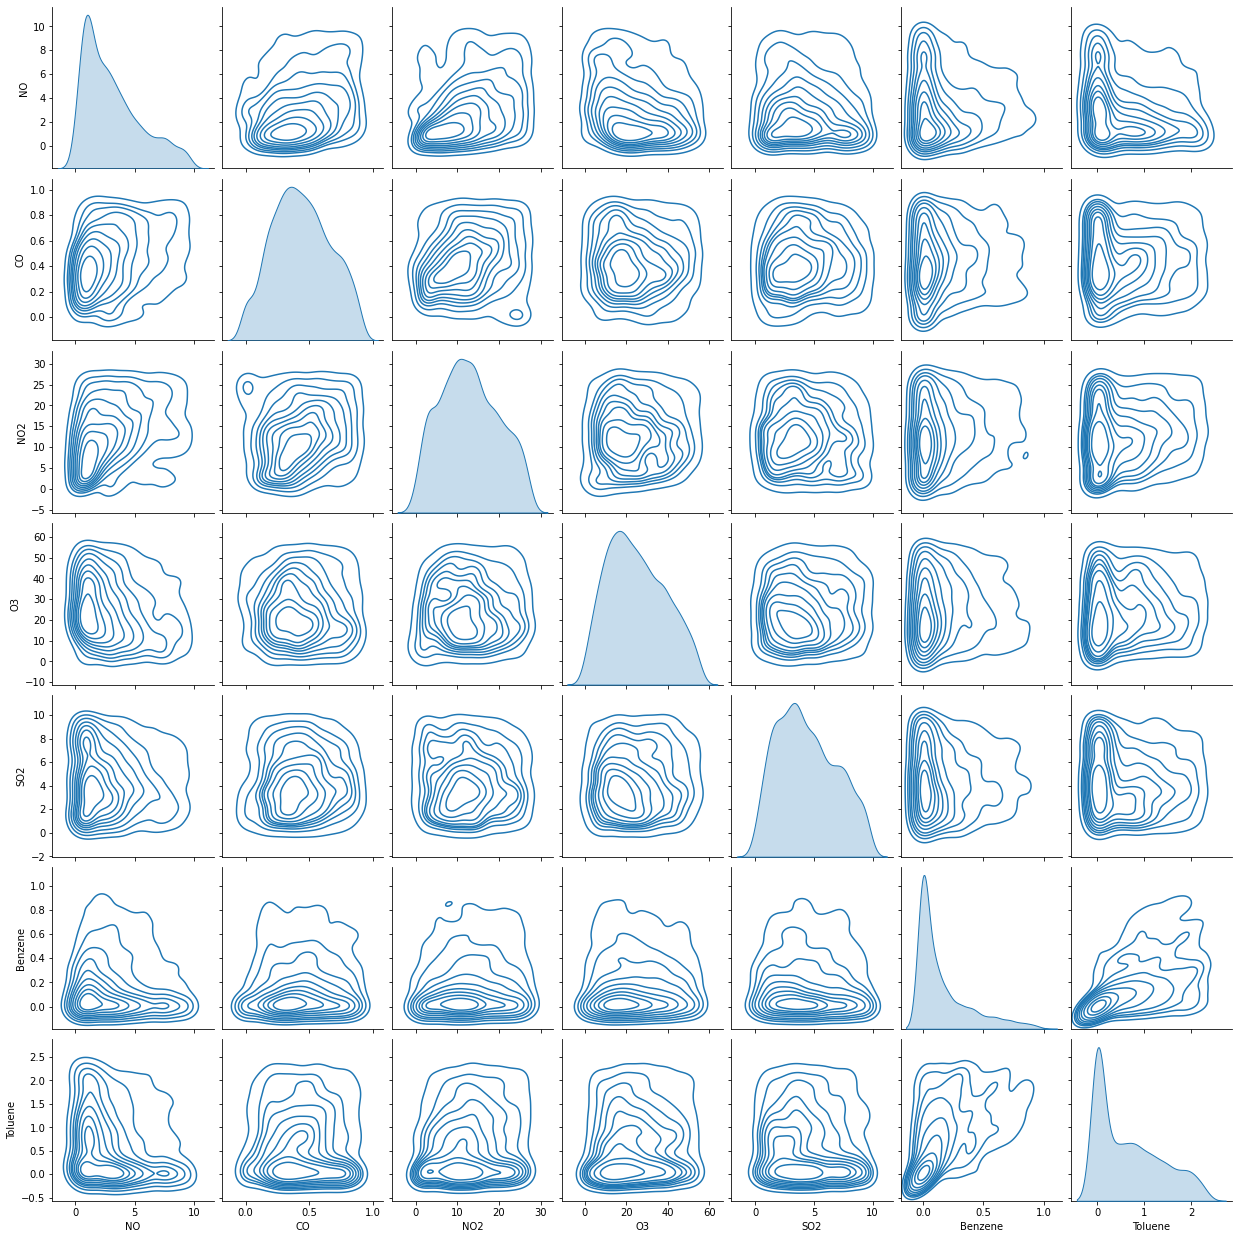

In [392]:
sns.pairplot(twice_clipped, kind='kde')

In [563]:
x = np.linspace(-10, 10, num=1000)
y = 5 * x + 2

In [564]:
y_hat = 1.1 * np.power(y, 2) + np.random.normal(size=y.shape)

In [565]:
stats.pearsonr(y, y_hat)

(0.15295494286672334, 1.177235489535206e-06)

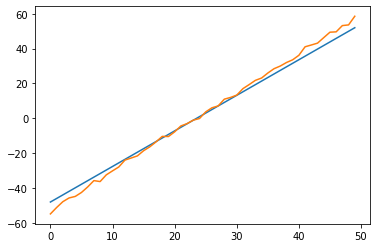

In [537]:
plt.plot(y)
plt.plot(y_hat)